In [3]:
import pandas as pd
import numpy as np
import nibabel as nib
import importlib
import tTsTGrpUtils as tsutil
import pickle
importlib.reload(tsutil)

<module 'tTsTGrpUtils' from '/host/verges/tank/data/daniel/3T7T/z/code/analyses/tTsTGrpUtils.py'>

In [24]:
# LOAD DATA
demographics = {
    "pth" : "/host/verges/tank/data/daniel/3T7T/z/data/pt/demo_27Aug2025.csv",
    # column names:
    'nStudies': True, # whether multiple studies are included
    "ID_7T" : "PNI_ID", 
    "ID_3T" : "MICS_ID",
    "SES" : "SES",
    "date": "Date",
    "age": "age",
    "sex": "sex",
    "grp" : "grp_detailed" # col name for participant grouping variable of interest
}


pth = "/host/verges/tank/data/daniel/3T7T/z/outputs/"

file_maps = "01_maps_09Sep2025-162453.pkl" # smoothed maps?
file_stats = "02_stats_10Sep2025-091747.pkl" # z, w scores for all participnats
file_stats_grp = "03_stats_grp_10Sep2025-163811.pkl" #  subsetted by group with ic
file_dStats = "04_dStats_grp_10Sep2025-180606.pkl" # d between grp and controls within study
file_comps = "05_comps_11Sep2025-170446.pkl" # d differences between 7T and 3T 

with open(pth + file_maps, "rb") as f:
    maps = pickle.load(f)

with open(pth + file_stats, "rb") as f:
    stats = pickle.load(f)

with open(pth + file_stats_grp, "rb") as f:
    stats_grp = pickle.load(f)

with open(pth + file_dStats, "rb") as f:
    dStats = pickle.load(f)

with open(pth + file_comps, "rb") as f:
    comps = pickle.load(f)

tsutil.print_dict(maps, df_print = False)
print("="*100)
tsutil.print_dict(stats, df_print = False)
print("="*100)
tsutil.print_dict(stats_grp, df_print = False)
print("="*100)
tsutil.print_dict(dStats, df_print = False)
print("="*100)
tsutil.print_dict(comps, df_print = False)
print("="*100)


 Dict list length (24 items)

[0]
	Keys: ['study', 'region', 'surf', 'label', 'feature', 'smth', 'df_demo', 'df_maps']
	study: MICs
	region: cortex
	surf: fsLR-5k
	label: thickness
	feature: thickness
	smth: 5
	df_demo: <DataFrame shape=(54, 71)>
	df_maps: <DataFrame shape=(54, 9686)>

[1]
	Keys: ['study', 'region', 'surf', 'label', 'feature', 'smth', 'df_demo', 'df_maps']
	study: PNI
	region: cortex
	surf: fsLR-5k
	label: thickness
	feature: thickness
	smth: 5
	df_demo: <DataFrame shape=(54, 71)>
	df_maps: <DataFrame shape=(54, 9686)>

[2]
	Keys: ['study', 'region', 'surf', 'label', 'feature', 'smth', 'df_demo', 'df_maps']
	study: MICs
	region: cortex
	surf: fsLR-5k
	label: thickness
	feature: thickness
	smth: 10
	df_demo: <DataFrame shape=(54, 71)>
	df_maps: <DataFrame shape=(54, 9686)>

[3]
	Keys: ['study', 'region', 'surf', 'label', 'feature', 'smth', 'df_demo', 'df_maps']
	study: PNI
	region: cortex
	surf: fsLR-5k
	label: thickness
	feature: thickness
	smth: 10
	df_demo: <DataFra

In [31]:
maps[1]['df_maps'].index

RangeIndex(start=0, stop=54, step=1)

In [ ]:
# PLOT SMTH MAPS
import time
importlib.reload(tsutil)
df_name = 'df_maps'
metric = '1' # indices in maps is participant number
ipsiTo = None

save_pth = "/host/verges/tank/data/daniel/3T7T/z/outputs/figs_debug_12Sep2025"

date = time.strftime("%d%b%Y")
for i, item in enumerate(maps):
    tsutil.printItemMetadata(item, i)
    # print ID-SES for the case
    
    col_ID = tsutil.get_IDCol(item['study'], demographics)
    df = item[df_name]
    id = df.loc[int(metric), col_ID]
    ses = df.loc[int(metric), 'SES'] if 'SES' in df.columns else ''
    print(f"\t\tID: {id}, SES: {ses}")

    save_name = f"01_maps_sub-{item['study']}_{item['feature']}_{item['surf']}_{item['label']}_{item['smth']}mm_{id}-{ses}_{date}"
    tsutil.itmToVisual(
                        item=item, 
                        df_name = df_name, 
                        metric = metric, 
                        ipsiTo = ipsiTo,
                        save_pth = save_pth,
                        save_name = save_name
                        ) # need to change max values dynamically based on data range

	[MICs] - cortex: thickness, fsLR-5k, thickness, 5mm (idx 0)
		ID: HC052, SES: 01
[showBrains] WARNING: MICAPIPE environment variable not set. Using hard-coded path /data_/mica1/01_programs/micapipe-v0.2.0
[showBrains] Plot saved to 01_maps_sub-MICs_thickness_fsLR-5k_thickness_5mm_HC052-01_12Sep2025_fsLR-5k_12Sep2025-0859.png
	[PNI] - cortex: thickness, fsLR-5k, thickness, 5mm (idx 1)
		ID: PNC006, SES: 01
[showBrains] WARNING: MICAPIPE environment variable not set. Using hard-coded path /data_/mica1/01_programs/micapipe-v0.2.0
[showBrains] Plot saved to 01_maps_sub-PNI_thickness_fsLR-5k_thickness_5mm_PNC006-01_12Sep2025_fsLR-5k_12Sep2025-0859.png
	[MICs] - cortex: thickness, fsLR-5k, thickness, 10mm (idx 2)
		ID: HC052, SES: 01
[showBrains] WARNING: MICAPIPE environment variable not set. Using hard-coded path /data_/mica1/01_programs/micapipe-v0.2.0
[showBrains] Plot saved to 01_maps_sub-MICs_thickness_fsLR-5k_thickness_10mm_HC052-01_12Sep2025_fsLR-5k_12Sep2025-0859.png
	[PNI] - corte

In [ ]:
item = dStats[18]

df_name = 'df_d_ic'

print(list(item[df_name].index))

d_df_z_TLE_ic_ipsiTo-L
[showBrains] WARNING: MICAPIPE environment variable not set. Using hard-coded path /data_/mica1/01_programs/micapipe-v0.2.0


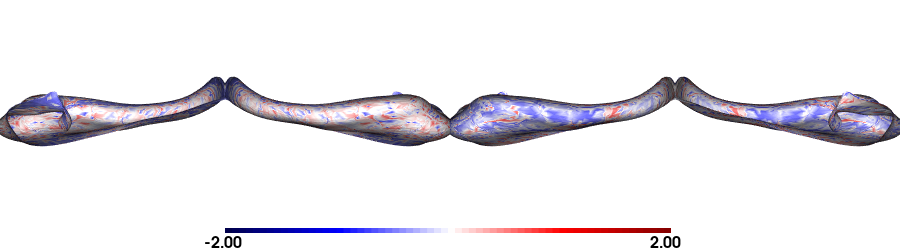

In [16]:
importlib.reload(tsutil)

item = dStats[18]
df_name = 'df_d_ic'
metric = 'd_df_z_TLE_ic_ipsiTo-L'
print(metric)
ipsiTo = 'L'

tsutil.itmToVisual(
                        item=item, 
                        df_name = df_name, 
                        metric = metric, 
                        ipsiTo = ipsiTo
                        )  

In [ ]:
# ridge plots for individual patients, import dictionary lists with raw maps
# import dictionary lists with raw maps


demographics = {
    "pth" : "/host/verges/tank/data/daniel/3T7T/z/data/pt/demo_27Aug2025.csv",
    # column names:
    'nStudies': True, # whether multiple studies are included
    "ID_7T" : "PNI_ID", 
    "ID_3T" : "MICS_ID",
    "SES" : "SES",
    "date": "Date",
    "age": "age",
    "sex": "sex",
    "grp" : "grp_detailed" # col name for participant grouping variable of interest
}
#tsutil.print_dict(dl, df_print=False)

In [ ]:
# ridge plots
for i in range(len(dl)):
    df_demo = dl[i]['df_demo']
    df_maps = dl[i]['df_maps']
    label = dl[i]['label']
    surface = dl[i]['surf']
    region = dl[i]['region']
    feature = dl[i]['feature']
    study = dl[i]['study']
    smth = dl[i]['smth']
    print(f"[{study}] {region}, {feature}, {label}, {surface} , {smth}")

    #print(df_maps.columns)
    col_ID = tsutil.get_IDCol(study, demographics)

    # rename col_ID as ID
    df_demo.rename(columns={col_ID: 'id'}, inplace=True)

    # remove ID, SES cols
    df_maps['ID_SES'] = df_maps[col_ID].astype(str) + '_' + df_maps['SES'].astype(str) # concat ID and SES into single col
    df_maps.set_index('ID_SES', inplace=True)
    df_maps.drop([col_ID, 'SES'], axis=1, inplace=True)

    df_maps.head()

    # add a row to df_maps that randomly samples from a normal distribution centered around the mean of each column
    means = df_maps.mean(axis=0)
    stds = df_maps.std(axis=0)
    random_row = np.random.normal(loc=means, scale=stds)
    random_row_df = pd.DataFrame([random_row], index=['random_sample'], columns=df_maps.columns)
    df_maps = pd.concat([df_maps, random_row_df])
    # add also a row to df_demo with'grp_detailed' = 'random_sample'
    df_demo = pd.concat([df_demo, pd.DataFrame({'grp_detailed': ['random_sample']})], ignore_index=True)
    df_demo.set_index(df_maps.index, inplace=True)

    # plot ridgeplot
    # get range
    min_val = means.mean() - 10 * stds.mean()
    max_val = means.mean() + 10 * stds.mean()

    tsutil.plot_ridgeplot(df_maps, matrix_df=df_demo[['id','SES','grp_detailed']], Range=(min_val, max_val), Xlab = f"[{study}] {region}, {feature}, {label}, {surface}, {smth}")


In [ ]:
# visualize
item= comps[3]
tsutil.printItemMetadata(item, idx=2)
metric = 'm_df_w_TLE_ic_ipsiTo-L_3T'
print(metric)
tsutil.itmToVisual(
                        item=item, 
                        df_name = df_name, 
                        metric = metric, 
                        ipsiTo = ipsiTo,
                        max_val = 2
                        )